In [1]:
import re
import nltk


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


In [3]:
stemmer = PorterStemmer()
df = pd.read_csv('mbti_1.csv')


In [4]:
print(df.head(10))
print("*" * 40)
print(df.info())
print(".....Starting data preprocessing.....")
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||", " ")
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)
    return text


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
.....Starting

In [5]:
df['posts'] = df['posts'].apply(cleanText)
df.head()
print(df.head())
dlist = df['type'].value_counts()

print(dlist)


   type                                              posts
0  INFJ  '  enfp and intj moments    sportscenter not t...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____    Of course, to which I say ...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired. That's another silly misconcept...
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


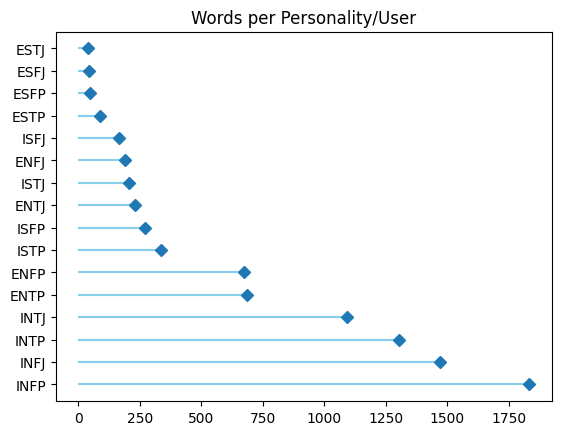

In [6]:
plt.hlines(y=list(range(16)), xmin=0, xmax=dlist, color='skyblue')
plt.plot(dlist, list(range(16)), "D")
plt.title("Words per Personality/User")
plt.yticks(list(range(16)), dlist.index)
plt.show()

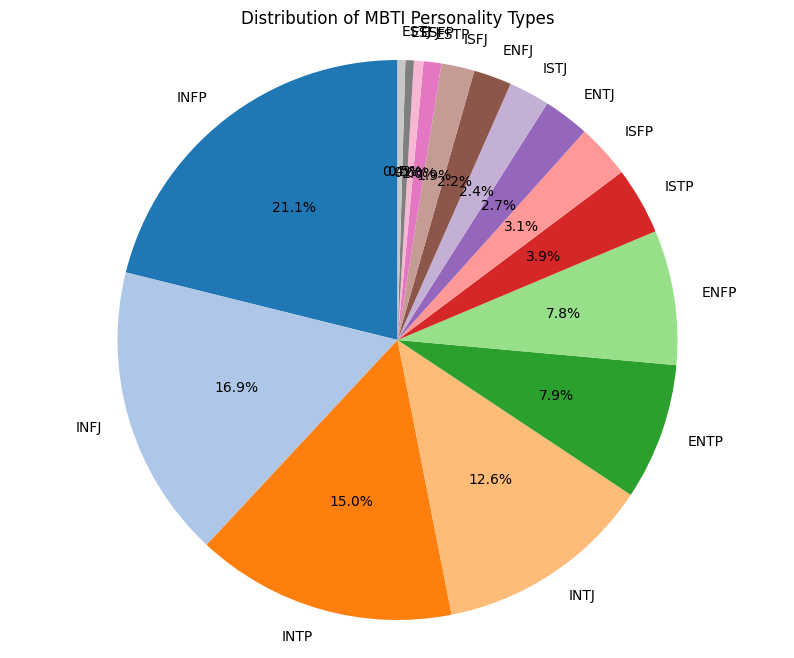

In [7]:
data = {
    'Personality Type': ['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'ENTJ', 'ISTJ', 'ENFJ', 'ISFJ',
                         'ESTP', 'ESFP', 'ESFJ', 'ESTJ'],
    'Count': [1832, 1470, 1304, 1091, 685, 675, 337, 271, 231, 205, 190, 166, 89, 48, 42, 39]
}
df1= pd.DataFrame(data)
df1['Percentage'] = (df1['Count'] / df1['Count'].sum()) * 100
# Plotting
plt.figure(figsize=(10, 8))
plt.pie(df1['Percentage'], labels=df1['Personality Type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of MBTI Personality Types')
plt.show()


In [8]:
# prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}

In [10]:
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)

In [11]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http') / 50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music') / 50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?') / 50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg') / 50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!') / 50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...') / 50)

In [12]:
X = df.drop(['type', 'posts', 'I-E', 'N-S', 'T-F', 'J-P'], axis=1).values
y = df['type'].values
print(y.shape)
print(X.shape)

(8675,)
(8675, 6)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [14]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pre = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log, 2, ), "%")

23.37 %


In [15]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Y_pre = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn, 2, ), "%")


47.18 %


In [16]:
# Hybrid model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Testing Data Set", round(acc_random_forest, 2, ), "%")


Testing Data Set 91.44 %


In [17]:
# M1 on introversion/extroversion column

#########################################################################################################

X1 = df.drop(['type', 'posts', 'I-E'], axis=1).values
Y1 = df['I-E'].values

print("Outcome shape", Y1.shape)
print("input shape for learnign data", X1.shape)

Outcome shape (8675,)
input shape for learnign data (8675, 9)


In [18]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=5)

In [19]:
# Logistic regression
logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)

Y_pre1 = logreg1.predict(X1_test)

acc_log1 = round(logreg1.score(X1_train, y1_train) * 100, 2)
print("Accuracy Score for Logistic regression:")
print(round(acc_log1, 2, ), "%")

Accuracy Score for Logistic regression:
76.94 %


In [20]:
# KNN

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X1_train, y1_train)

Y1_pre1 = knn1.predict(X1_test)

acc_knn1 = round(knn1.score(X1_train, y1_train) * 100, 2)
print("Accuracy Score for knn:")
print(round(acc_knn1, 2, ), "%")

Accuracy Score for knn:
83.1 %


In [21]:
# Hybrid model
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X1_train, y1_train)
Y1_prediction1 = random_forest1.predict(X1_test)

random_forest1.score(X1_train, y1_train)
acc_random_forest1 = round(random_forest1.score(X1_train, y1_train) * 100, 2)
print("Accuracy Score for random forest:")
print("Testing Data Set", round(acc_random_forest1, 2, ), "%")


Accuracy Score for random forest:
Testing Data Set 99.29 %


In [22]:
###################################################################

# M1 on introversion/extroversion column

X2 = df.drop(['type', 'posts', 'N-S'], axis=1).values
Y2 = df['N-S'].values

print("Outcome shape", Y2.shape)
print("input shape for learnign data", X2.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=5)

##########

Outcome shape (8675,)
input shape for learnign data (8675, 9)


In [23]:
# Logistic regression
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)

Y_pre2 = logreg2.predict(X2_test)

acc_log2 = round(logreg2.score(X2_train, y2_train) * 100, 2)
print("Accuracy Score for Logistic regression:")
print(round(acc_log2, 2, ), "%")


Accuracy Score for Logistic regression:
86.22 %


In [24]:
# KNN

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X2_train, y2_train)

Y1_pre2 = knn2.predict(X2_test)

acc_knn2 = round(knn2.score(X2_train, y2_train) * 100, 2)
print("Accuracy Score for knn:")
print(round(acc_knn2, 2, ), "%")

Accuracy Score for knn:
88.6 %


In [25]:
# Hybrid model
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X2_train, y2_train)
Y1_prediction2 = random_forest2.predict(X2_test)

random_forest2.score(X2_train, y2_train)
acc_random_forest2 = round(random_forest2.score(X2_train, y2_train) * 100, 2)
print("Accuracy Score for random forest:")
print("Testing Data Set", round(acc_random_forest2, 2, ), "%")

Accuracy Score for random forest:
Testing Data Set 99.39 %


In [26]:
# M1 on thinking/feeling column

X3 = df.drop(['type', 'posts', 'T-F'], axis=1).values
Y3 = df['T-F'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=5)


In [27]:
# Logistic regression
logreg3 = LogisticRegression()
logreg3.fit(X3_train, y3_train)

Y_pre3 = logreg3.predict(X3_test)

acc_log3 = round(logreg3.score(X3_train, y3_train) * 100, 2)
print("Accuracy Score for Logistic regression:")
print(round(acc_log3, 2, ), "%")


Accuracy Score for Logistic regression:
62.93 %


In [28]:
# KNN

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X3_train, y3_train)

Y1_pre3 = knn3.predict(X3_test)

acc_knn3 = round(knn3.score(X3_train, y3_train) * 100, 2)
print("Accuracy Score for knn:")
print(round(acc_knn3, 2, ), "%")


Accuracy Score for knn:
78.36 %


In [29]:
# Hybrid model
random_forest3 = RandomForestClassifier(n_estimators=100)
random_forest3.fit(X3_train, y3_train)
Y1_prediction3 = random_forest3.predict(X3_test)

random_forest3.score(X3_train, y3_train)
acc_random_forest3 = round(random_forest3.score(X3_train, y3_train) * 100, 2)
print("Accuracy Score for random forest:")
print("Testing Data Set", round(acc_random_forest3, 2, ), "%")


Accuracy Score for random forest:
Testing Data Set 98.6 %


In [30]:
# M1 on judging/perception column

X4 = df.drop(['type', 'posts', 'J-P'], axis=1).values
Y4 = df['J-P'].values

print(Y4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=5)



[0 1 1 ... 1 1 1]


In [31]:
# Logistic regression
logreg4 = LogisticRegression()
logreg4.fit(X4_train, y4_train)

Y_pre4 = logreg4.predict(X4_test)

acc_log4 = round(logreg4.score(X4_train, y4_train) * 100, 2)
print("Accuracy Score for Logistic regression:")
print(round(acc_log4, 2, ), "%")


Accuracy Score for Logistic regression:
60.31 %


In [32]:
# KNN

knn4 = KNeighborsClassifier(n_neighbors=3)
knn4.fit(X4_train, y4_train)

Y1_pre4 = knn4.predict(X4_test)

acc_knn4 = round(knn4.score(X4_train, y4_train) * 100, 2)
print("Accuracy Score for knn:")
print(round(acc_knn4, 2, ), "%")

# Hybrid model
random_forest4 = RandomForestClassifier(n_estimators=100)
random_forest4.fit(X4_train, y4_train)
Y1_prediction4 = random_forest4.predict(X4_test)

random_forest4.score(X4_train, y4_train)
acc_random_forest4 = round(random_forest4.score(X4_train, y4_train) * 100, 2)
print("Accuracy Score for random forest:")
print("Testing Data Set", round(acc_random_forest4, 2, ), "%")

Accuracy Score for knn:
77.12 %
Accuracy Score for random forest:
Testing Data Set 98.58 %


In [33]:
# READING IMAGES:

import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [34]:
datafile_1 = df[df['type'] == "INTJ"]
text = str(datafile_1['posts'].tolist())

In [35]:
img = cv2.imread("INTJ.jpeg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
INTJ_mask = np.array(rgbimg)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

In [36]:
image_colours = ImageColorGenerator(INTJ_mask)

In [37]:
custom_words = ["forward-thinking", "organized", "reserved", "imaginative", "structured", "harmony minded", 'quiet', 'logical', 'innovative', 'abstract', 'independent', 'visionary', 'determined', 'purposeful', 'individualistic', 'logical', 'strategic', 'leader']


In [38]:
wc = WordCloud(background_color="white", max_words=2000, mask=INTJ_mask, stopwords=stopwords, color_func=lambda *args, **kwargs: "purple")

In [39]:
wc.generate_from_text(" ".join(custom_words))


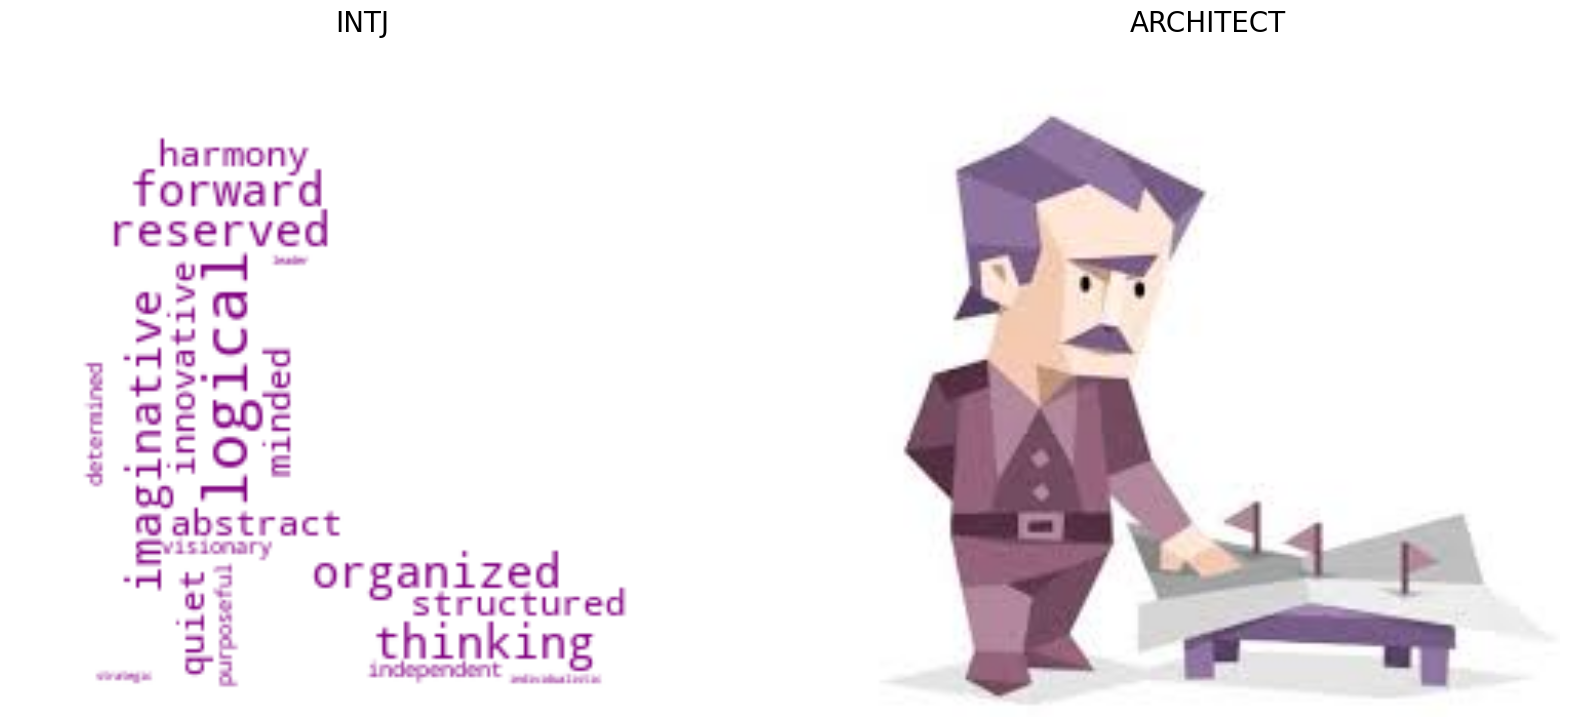

In [40]:
# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('INTJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("ARCHITECT", loc='center', fontsize=20)
plt.axis("off")
plt.show()

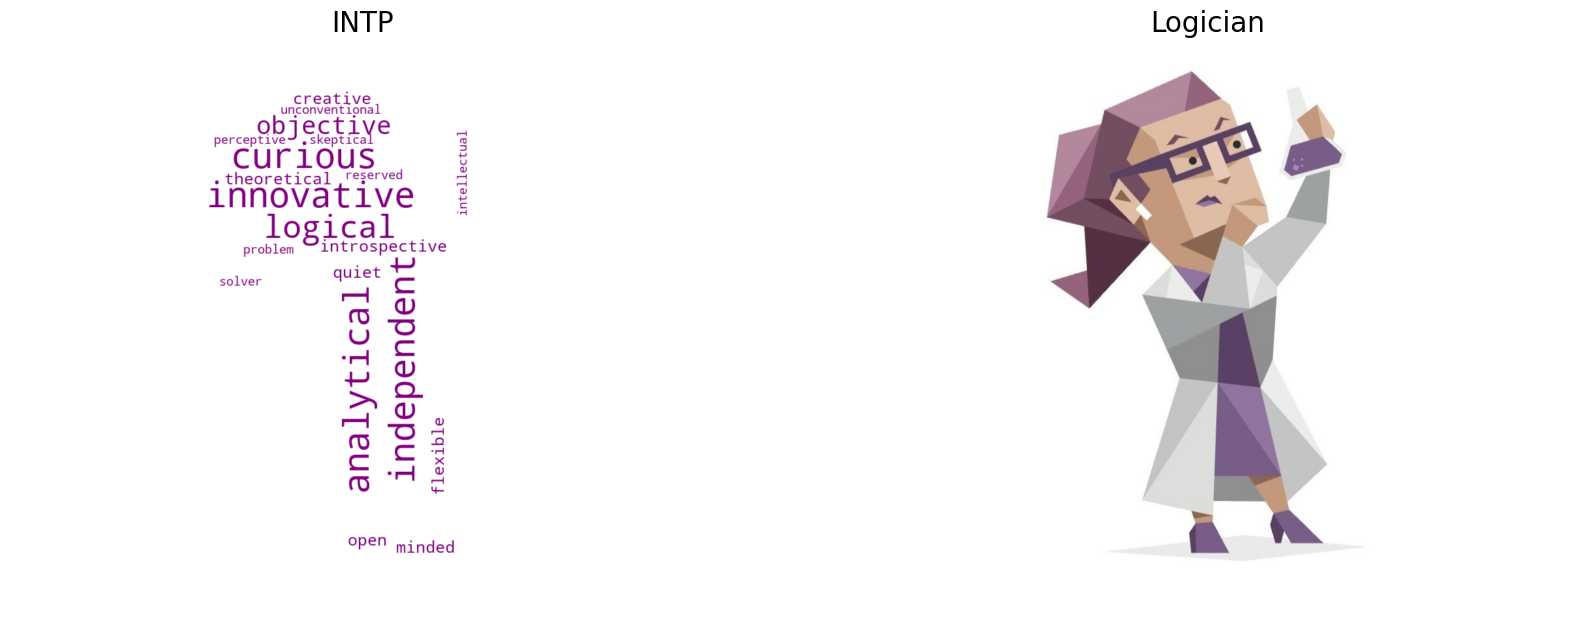

In [41]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("INTP.jpeg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
INTP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the INTP personality type
custom_words = ["innovative", "analytical", "curious", "independent", "logical", 
                "objective", "introspective", "quiet", "creative", "flexible", 
                "theoretical", "open-minded", "unconventional", "skeptical", 
                "reserved", "intellectual", "perceptive", "problem solver"]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=INTP_mask, 
               stopwords=stopwords, color_func=lambda *args, **kwargs: "purple")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('INTP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Logician", loc='center', fontsize=20)
plt.axis("off")
plt.show()


In [42]:
img = cv2.imread("ENTJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
INTP_mask = np.array(rgbimg)

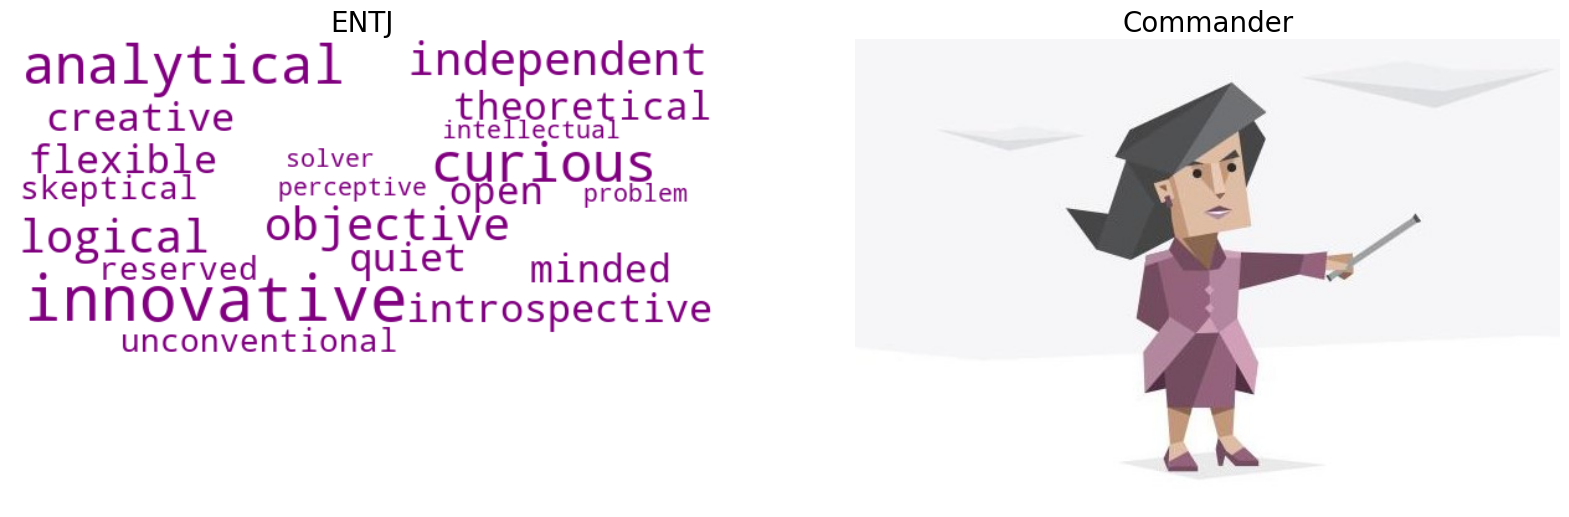

In [43]:
stopwords = set(STOPWORDS)

# Custom words associated with the INTP personality type
custom_words = ["innovative", "analytical", "curious", "independent", "logical", 
                "objective", "introspective", "quiet", "creative", "flexible", 
                "theoretical", "open-minded", "unconventional", "skeptical", 
                "reserved", "intellectual", "perceptive", "problem solver"]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=INTP_mask, 
               stopwords=stopwords, color_func=lambda *args, **kwargs: "purple")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ENTJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(INTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Commander", loc='center', fontsize=20)
plt.axis("off")
plt.show()


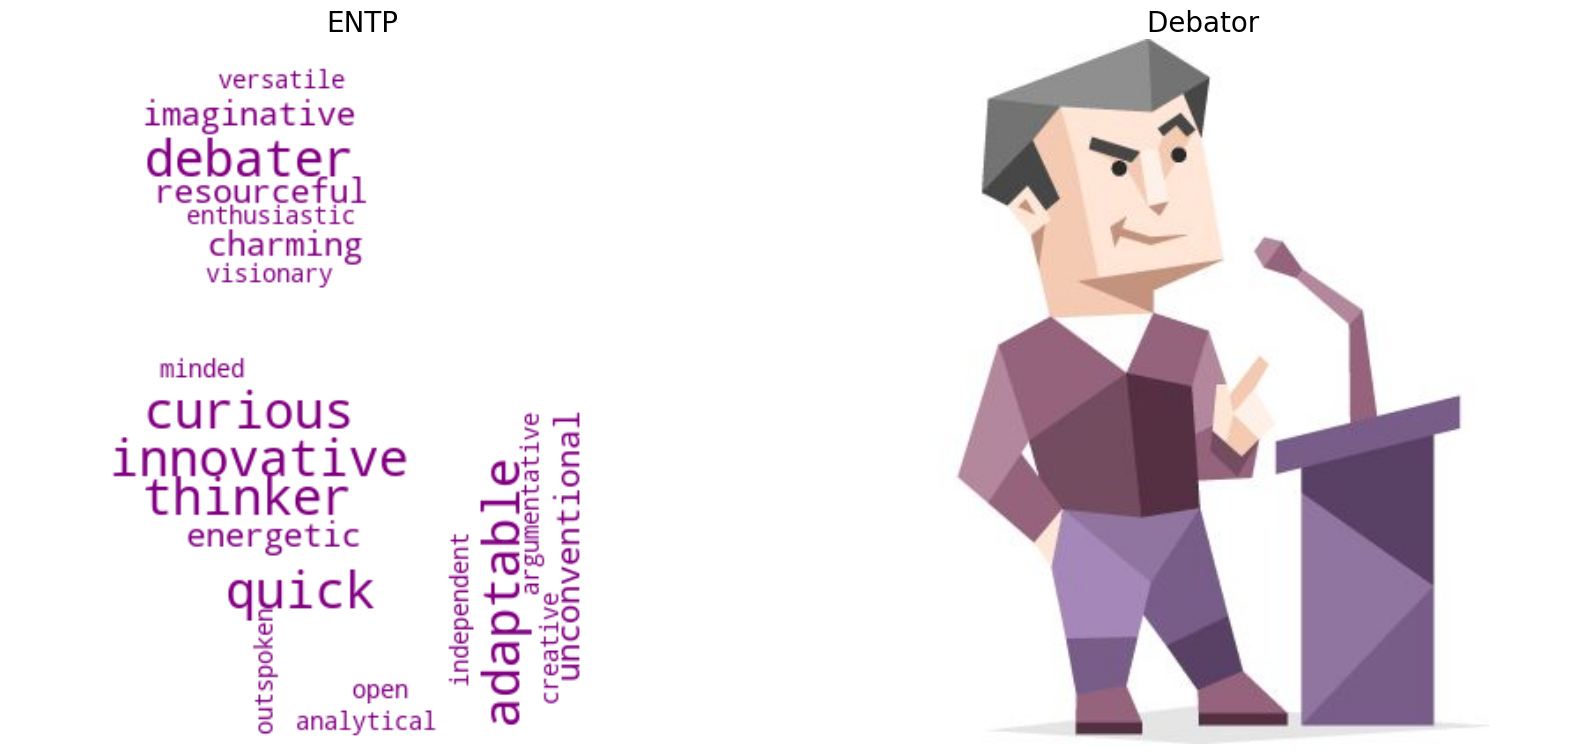

In [44]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ENTP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ENTP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ENTP personality type
custom_words = ["innovative", "curious", "debater", "quick thinker", "adaptable", 
                "resourceful", "unconventional", "imaginative", "charming", 
                "energetic", "analytical", "enthusiastic", "versatile", 
                "argumentative", "creative", "independent", "outspoken", 
                "visionary", "open-minded"]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ENTP_mask, 
               stopwords=stopwords, color_func=lambda *args, **kwargs: "purple")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ENTP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Debator ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


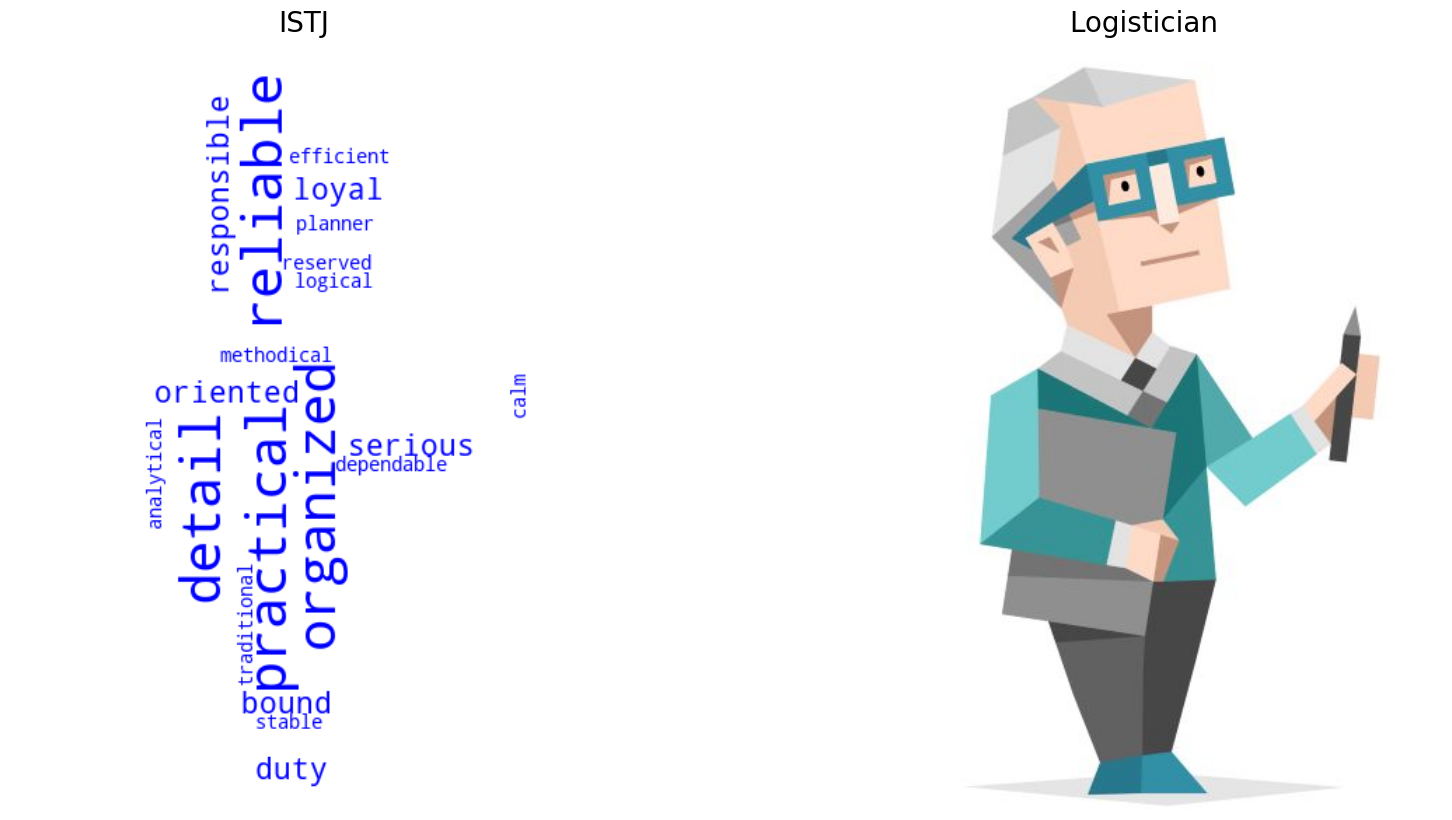

In [19]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ISTJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ISTJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ISTJ personality type
custom_words = ["practical", "reliable", "organized", "detail-oriented",
                "loyal", "responsible", "duty-bound", "serious", "dependable",
                "methodical", "efficient", "traditional", "stable", "calm",
                "reserved", "logical", "analytical", "planner"]

# Remove the non-breaking space character
custom_words = [word.strip() for word in custom_words]  # Remove leading/trailing spaces

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ISTJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "blue")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ISTJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Logistician ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


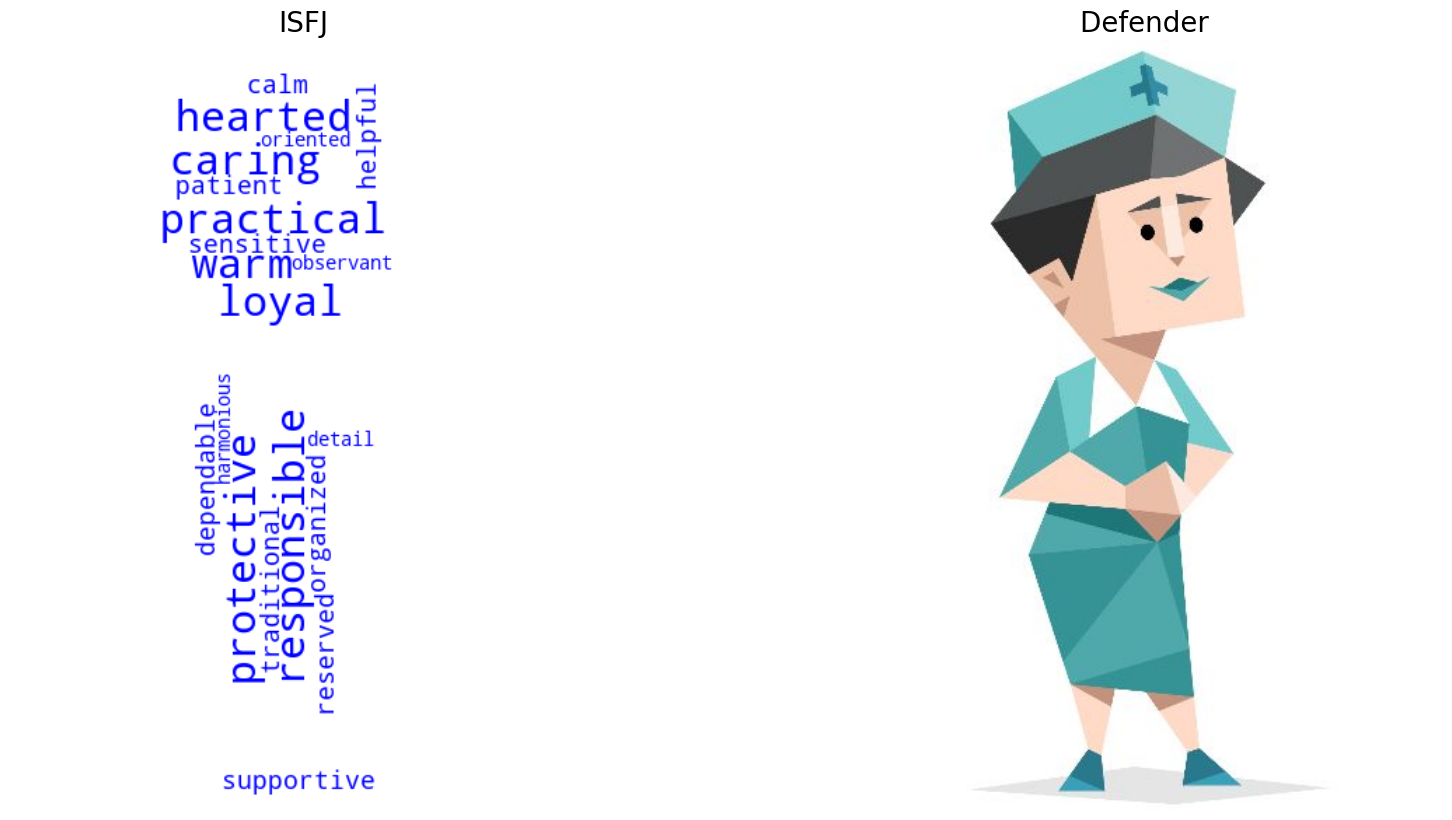

In [18]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ISFJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ISFJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ISFJ personality type
custom_words = ["practical", "responsible", "caring", "loyal", "protective",
                "warm-hearted", "supportive", "sensitive", "dependable",
                "helpful", "organized", "traditional", "calm", "patient",
                "reserved", "observant", "detail-oriented", "harmonious"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ISFJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "blue")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ISFJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Defender ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


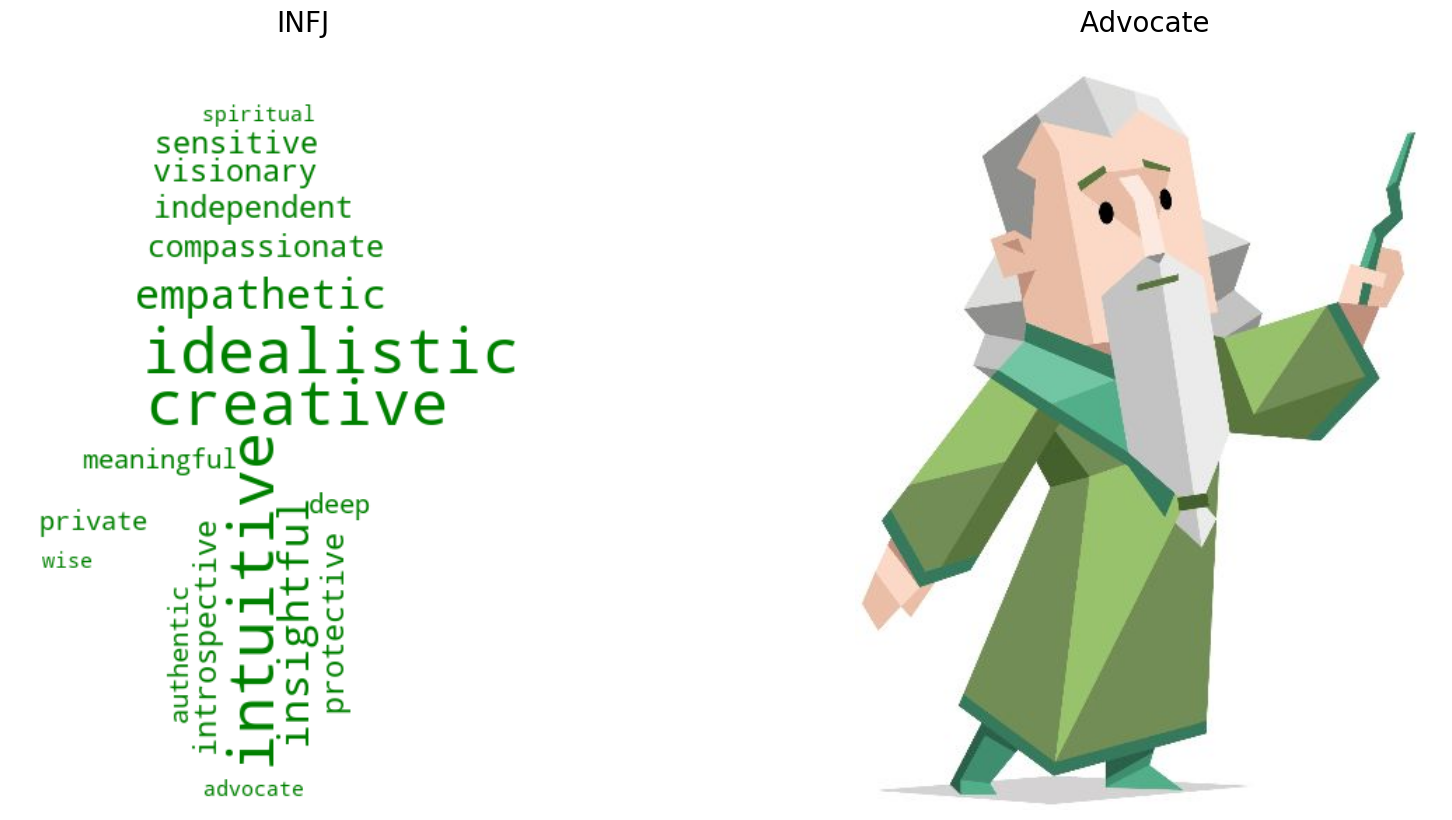

In [21]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("INFJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
INFJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the INFJ personality type
custom_words = ["idealistic", "creative", "intuitive", "empathetic", "insightful",
                "compassionate", "protective", "independent", "visionary",
                "introspective", "sensitive", "meaningful", "deep", "authentic",
                "private", "spiritual", "wise", "advocate"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=INFJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "green")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('INFJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Advocate ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


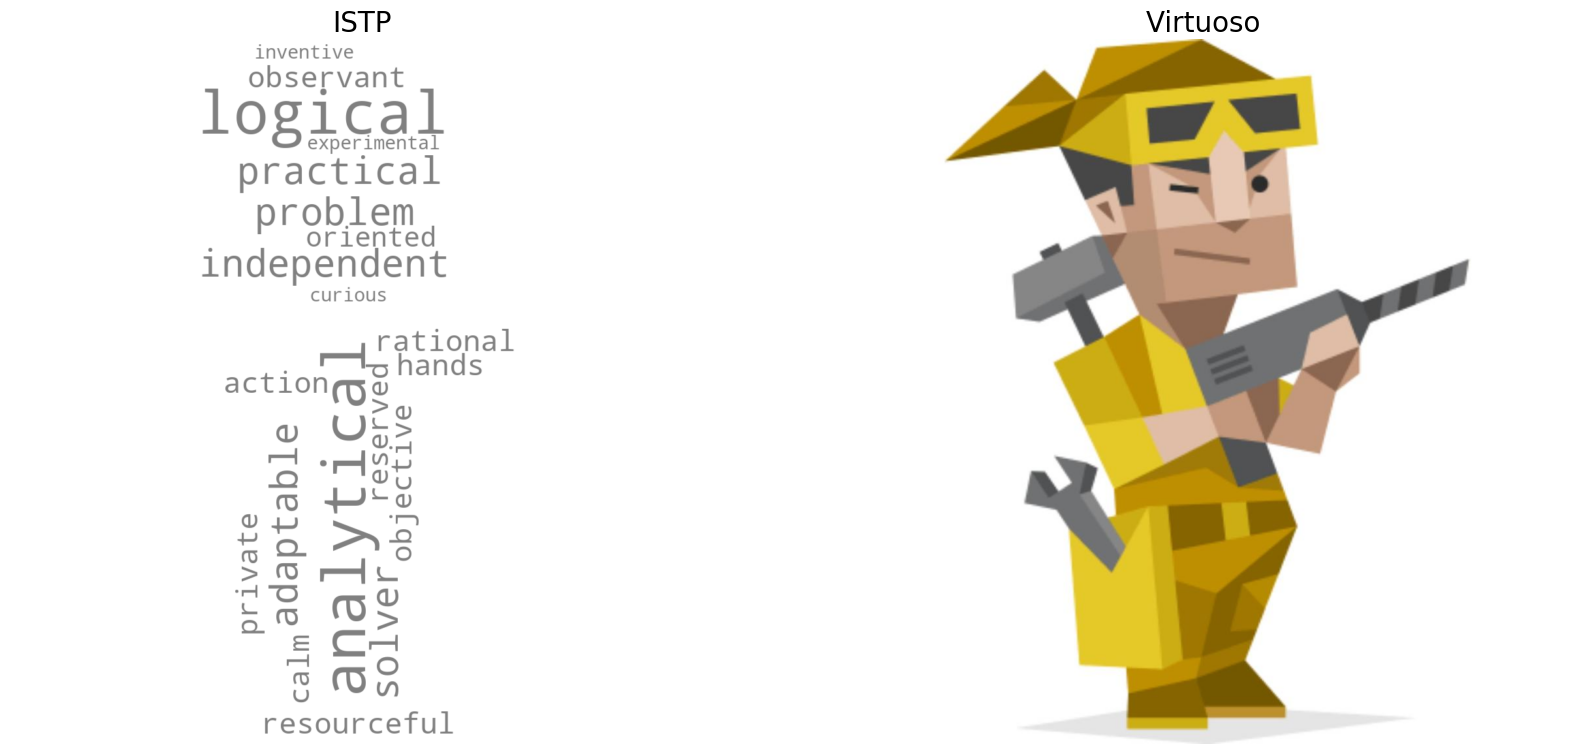

In [24]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ISTP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ISTP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ISTP personality type
custom_words = ["logical", "analytical", "independent", "practical", "problem-solver",
                "adaptable", "resourceful", "hands-on", "observant", "objective",
                "rational", "calm", "private", "reserved", "action-oriented",
                "experimental", "curious", "inventive"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ISTP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "gray")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ISTP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Virtuoso ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


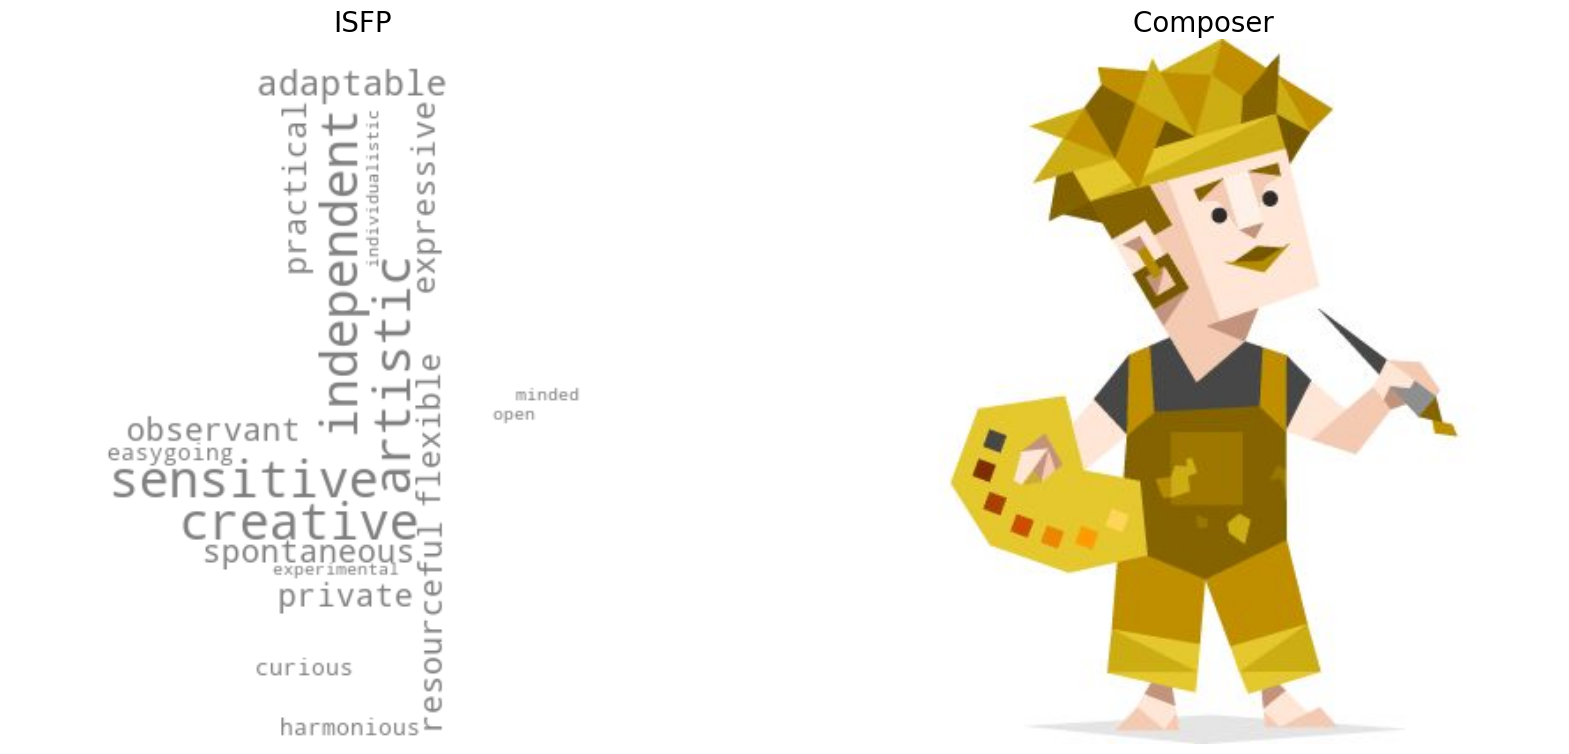

In [26]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ISFP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ISFP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ISFP personality type
custom_words = ["independent", "creative", "artistic", "sensitive", "adaptable",
                "spontaneous", "private", "observant", "expressive", "flexible",
                "practical", "resourceful", "easygoing", "harmonious", "curious",
                "experimental", "individualistic", "open-minded"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ISFP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "gray")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ISFP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ISFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Composer ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


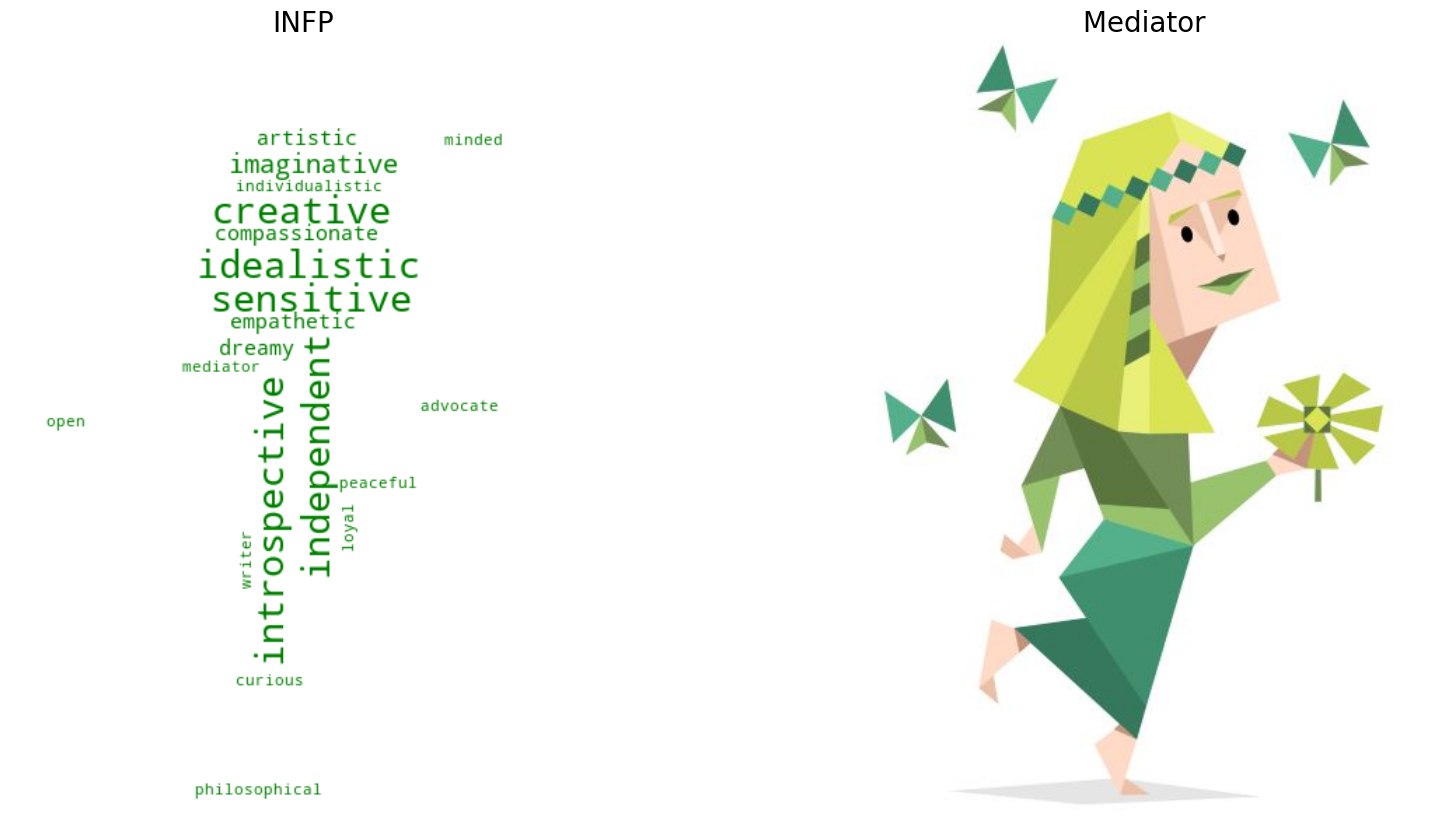

In [27]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("INFP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
INFP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the INFP personality type
custom_words = ["idealistic", "creative", "sensitive", "introspective", "independent",
                "imaginative", "compassionate", "empathetic", "dreamy", "artistic",
                "philosophical", "individualistic", "loyal", "curious", "open-minded",
                "peaceful", "mediator", "advocate", "writer"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=INFP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "green")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('INFP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(INFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Mediator ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


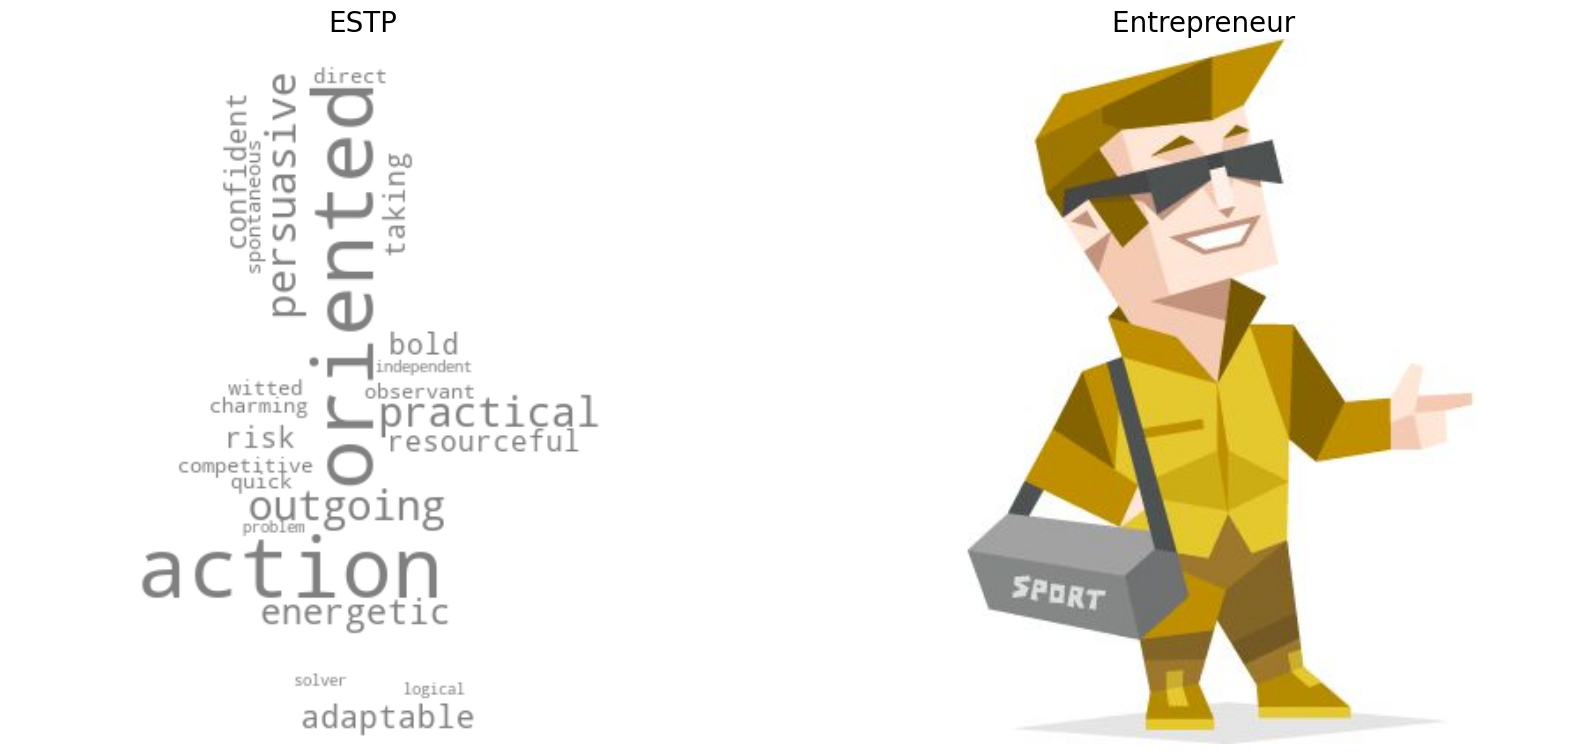

In [28]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ESTP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ESTP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ESTP personality type
custom_words = ["action-oriented", "practical", "persuasive", "outgoing", "energetic",
                "adaptable", "resourceful", "confident", "bold", "risk-taking",
                "competitive", "direct", "observant", "quick-witted", "spontaneous",
                "charming", "independent", "logical", "problem-solver"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ESTP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "gray")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ESTP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Entrepreneur ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


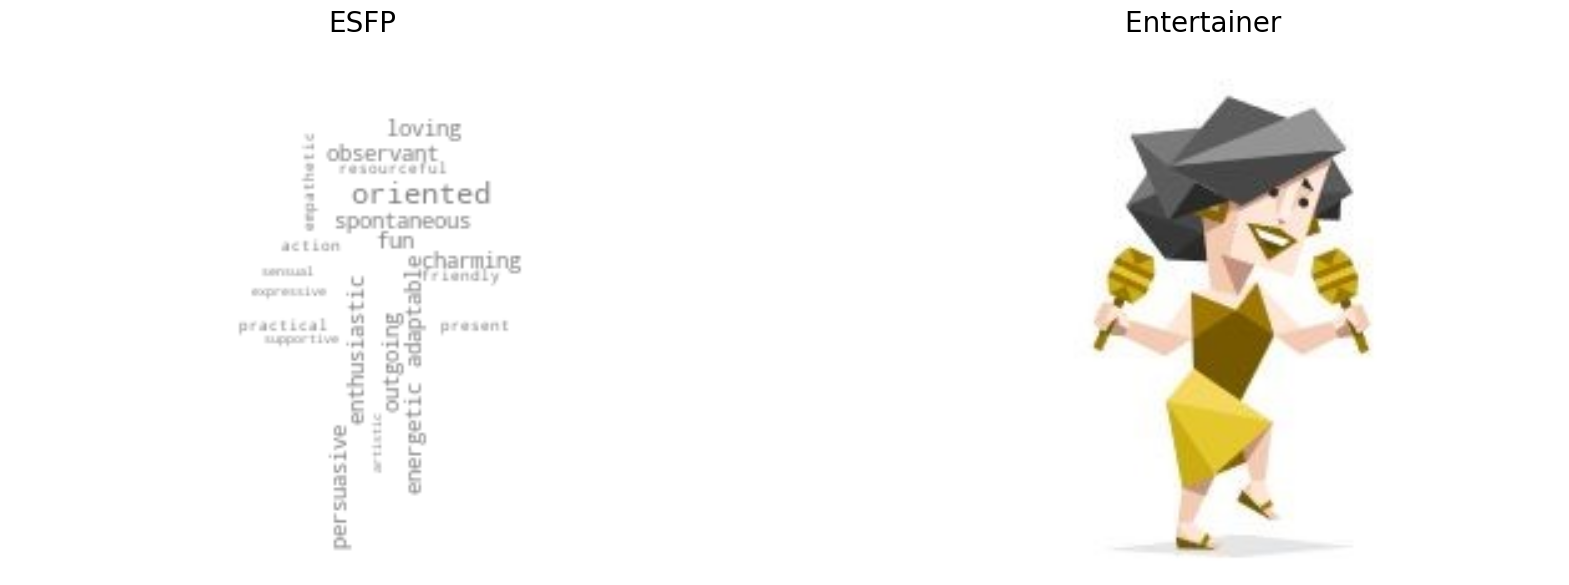

In [30]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ESFP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ESFP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ESFP personality type
custom_words = ["enthusiastic", "outgoing", "energetic", "spontaneous", "fun-loving",
                "observant", "adaptable", "charming", "persuasive", "resourceful",
                "practical", "action-oriented", "present-oriented", "friendly",
                "empathetic", "supportive", "expressive", "artistic", "sensual"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ESFP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "gray")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ESFP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Entertainer ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


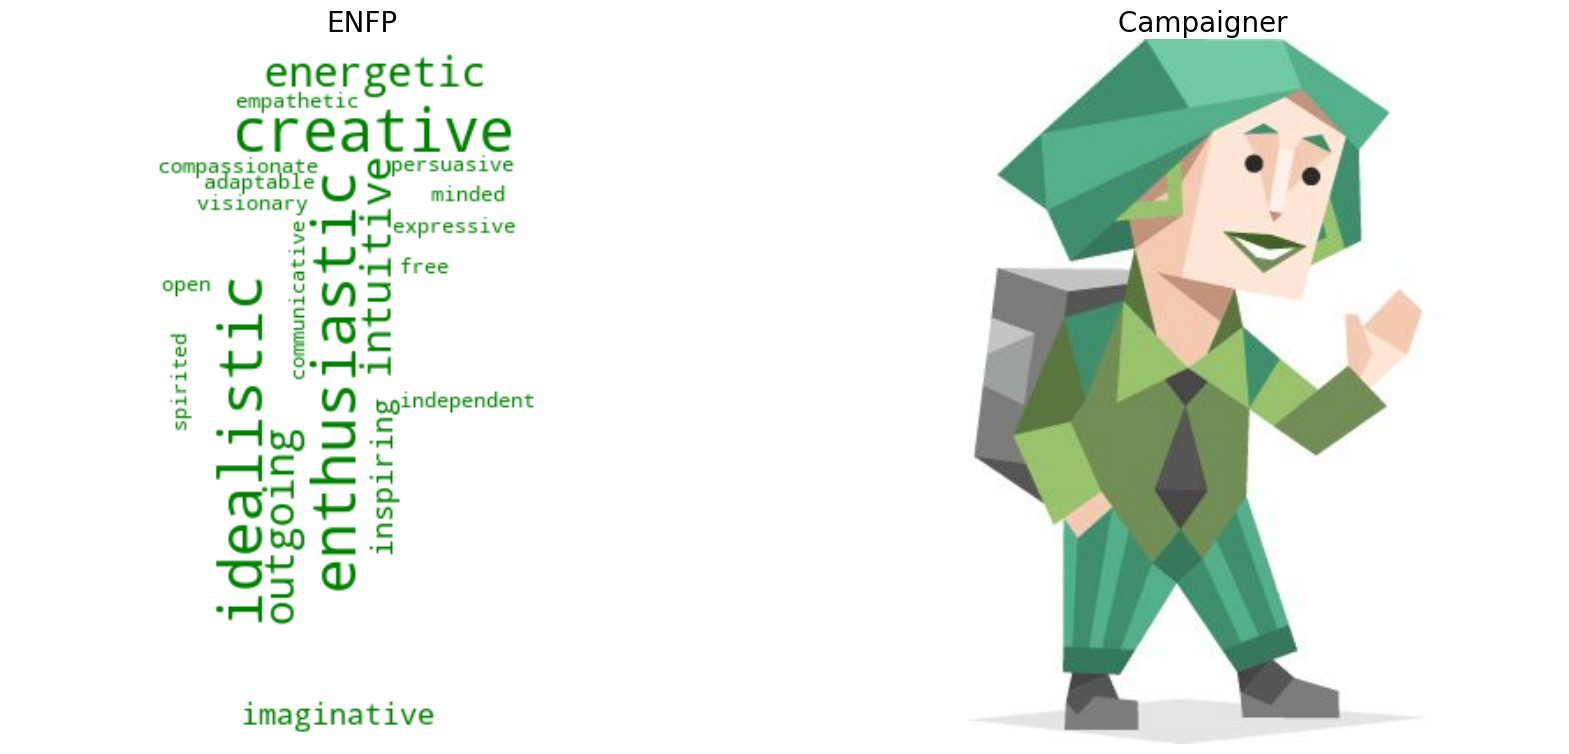

In [36]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ENFP.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ENFP_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ENFP personality type
custom_words = ["creative", "idealistic", "enthusiastic", "energetic", "outgoing",
                "intuitive", "imaginative", "inspiring", "compassionate", "empathetic",
                "open-minded", "adaptable", "independent", "free-spirited",
                "expressive", "communicative", "persuasive", "visionary"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ENFP_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "green")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ENFP', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFP_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Campaigner ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


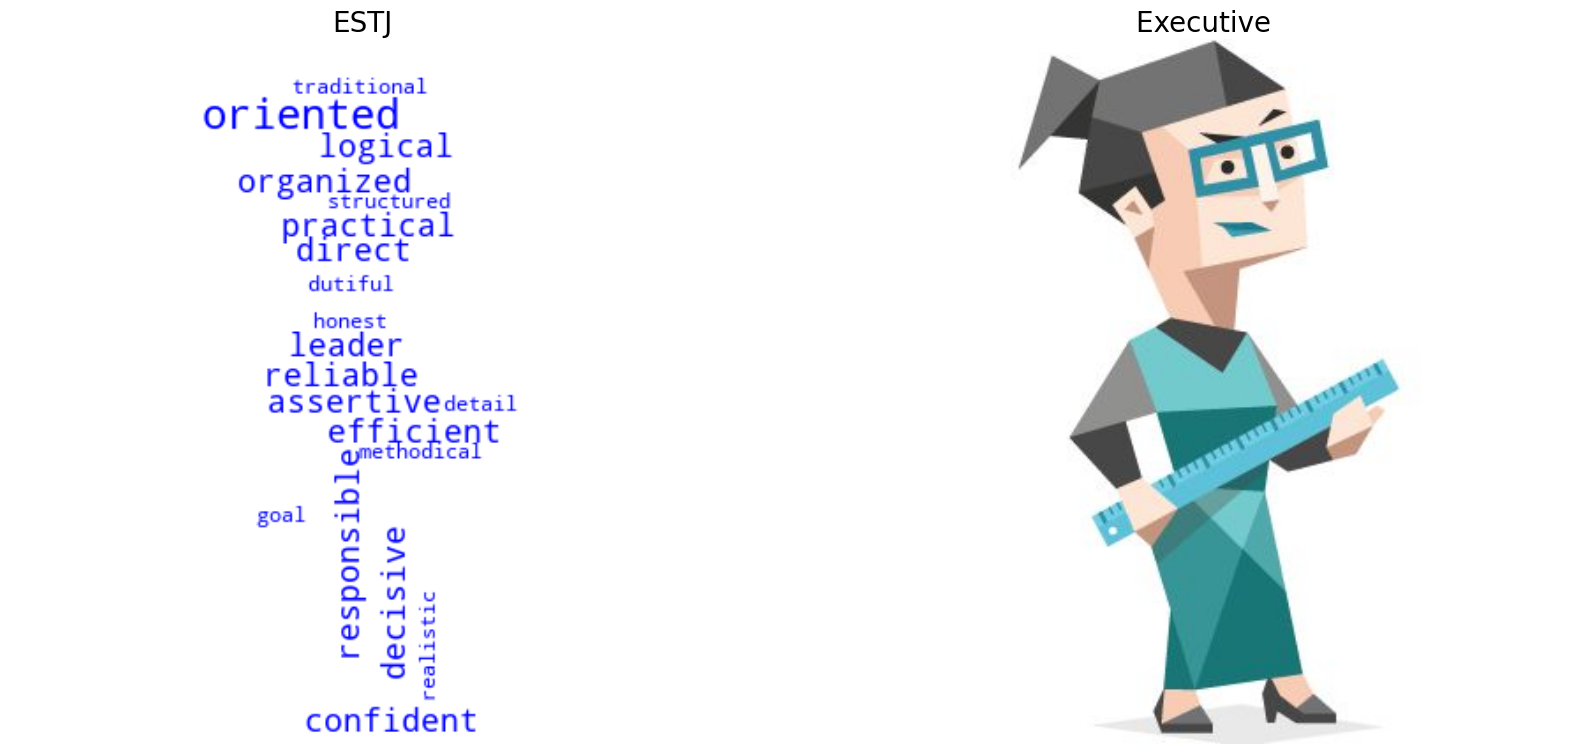

In [37]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ESTJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ESTJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ESTJ personality type
custom_words = ["organized", "efficient", "practical", "logical", "responsible",
                "reliable", "assertive", "direct", "confident", "decisive",
                "leader", "traditional", "structured", "goal-oriented",
                "detail-oriented", "methodical", "realistic", "honest", "dutiful"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ESTJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "blue")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ESTJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESTJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Executive ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


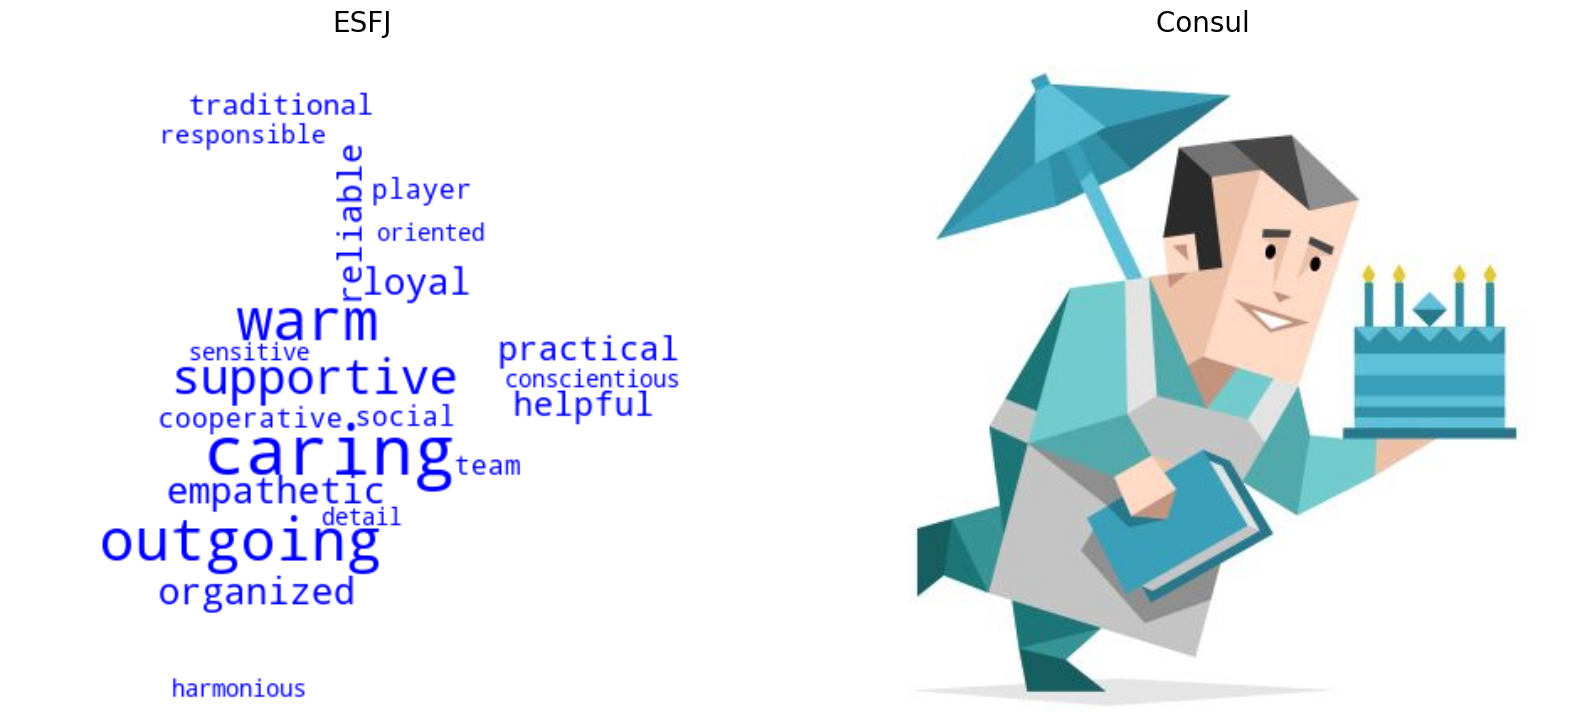

In [39]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ESFJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ESFJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ESFJ personality type
custom_words = ["caring", "outgoing", "warm", "supportive", "empathetic",
                "loyal", "organized", "practical", "helpful", "reliable",
                "traditional", "cooperative", "team player", "social",
                "responsible", "conscientious", "detail-oriented", "sensitive",
                "harmonious"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ESFJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "blue")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ESFJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ESFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Consul ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


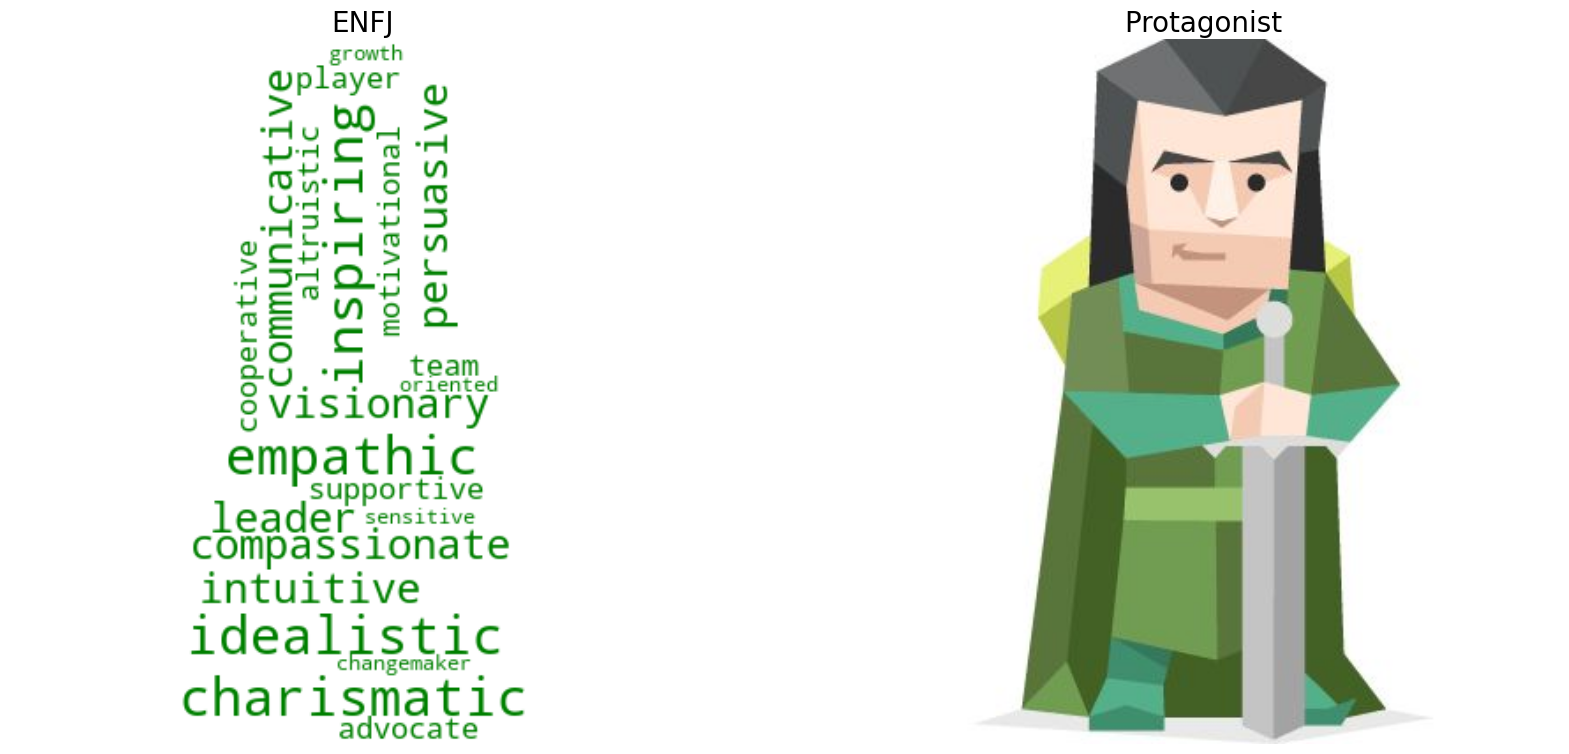

In [41]:
import numpy as np
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the image mask for the personality type
img = cv2.imread("ENFJ.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ENFJ_mask = np.array(rgbimg)

# Define stopwords
stopwords = set(STOPWORDS)

# Custom words associated with the ENFJ personality type
custom_words = ["charismatic", "inspiring", "idealistic", "empathic", "compassionate",
                "visionary", "intuitive", "persuasive", "communicative", "leader",
                "supportive", "motivational", "cooperative", "team player",
                "altruistic", "advocate", "changemaker", "growth-oriented",
                "sensitive"]

# Remove leading/trailing spaces from custom words
custom_words = [word.strip() for word in custom_words]

# Generate word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=ENFJ_mask,
              stopwords=stopwords, color_func=lambda *args, **kwargs: "green")
wc.generate_from_text(" ".join(custom_words))

# Show the word cloud
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(wc, interpolation="bilinear")
plt.title('ENFJ', loc='center', fontsize=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(ENFJ_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.title("Protagonist ", loc='center', fontsize=20)
plt.axis("off")
plt.show()


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Example model
from sklearn.metrics import accuracy_score

# Load data (replace with your actual dataset)
data = pd.read_csv("mbti_1.csv")

# Feature selection (text data)
text_data = data["posts"]  # Assuming "posts" column contains the text data

# Target variable (personality trait)
y = data["type"]  # Assuming "type" column contains the personality trait

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(text_data, y, test_size=0.2, random_state=42)

# Feature extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Model training (LogisticRegression example)
model = LogisticRegression(multi_class="ovr")
model.fit(X_train_features, y_train)

# User input
while True:
  user_sentence = input("Enter a sentence (or type 'quit' to exit): ")
  if user_sentence.lower() == "quit":
    break

  # Feature extraction for user input
  user_features = vectorizer.transform([user_sentence])

  # Prediction
  predicted_trait = model.predict(user_features)[0]

  print(f"Predicted personality trait: {predicted_trait}")


Enter a sentence (or type 'quit' to exit):  I am an advocate and motivational speaker


Predicted personality trait: ENFP


Enter a sentence (or type 'quit' to exit):  I am loyal,helful ,caring and team player


Predicted personality trait: INFP


Enter a sentence (or type 'quit' to exit):  I am  lazy 


Predicted personality trait: INTP


Enter a sentence (or type 'quit' to exit):  I love to paint 


Predicted personality trait: INFP


Enter a sentence (or type 'quit' to exit):  quit


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Load data (replace with your actual dataset)
data = pd.read_csv("mbti_1.csv")

# Feature selection (text data)
text_data = data["posts"]  # Assuming "posts" column contains the text data

# Target variable (personality trait)
y = data["type"]  # Assuming "type" column contains the personality trait

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(text_data, y, test_size=0.2, random_state=42)

# Feature extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Model training (Random Forest)
model = RandomForestClassifier(n_estimators=40, random_state=42)  # Adjust n_estimators as needed
model.fit(X_train_features, y_train)

# User input
while True:
    user_sentence = input("Enter a sentence (or type 'quit' to exit): ")
    if user_sentence.lower() == "quit":
        break

    # Feature extraction for user input
    user_features = vectorizer.transform([user_sentence])

    # Prediction
    predicted_trait = model.predict(user_features)[0]

    print(f"Predicted personality trait: {predicted_trait}")


Enter a sentence (or type 'quit' to exit):  I love travelling 


Predicted personality trait: INFP


Enter a sentence (or type 'quit' to exit):  I am independent person 


Predicted personality trait: INTP


Enter a sentence (or type 'quit' to exit):  i am changemaker


Predicted personality trait: INTP


Enter a sentence (or type 'quit' to exit):  She is growth oriented person


Predicted personality trait: INTP


Enter a sentence (or type 'quit' to exit):  He is very friendly and funny person and he loves travelling


Predicted personality trait: INTP


Enter a sentence (or type 'quit' to exit):  I am an advocate ,motival speaker,team player


Predicted personality trait: ENFP


Enter a sentence (or type 'quit' to exit):  quit
